**Import Libraries**

In [49]:
import cv2
import os
import numpy as np



In [50]:
data = r"DataSet"

In [51]:
categories= os.listdir(data)

In [52]:
print(categories)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))

['Improper', 'WithMask', 'WithoutMask']


Image Resizing

In [53]:
img_size = 100
data , target = [] , []
DIRECTORY = r"C:\Users\sushma\Desktop\python wrksheet\mask-detection\DataSet"


In [54]:
for category in categories:
    folder_path = os.path.join(DIRECTORY,category)
    img_names = os.listdir(folder_path)
    img_names = img_names[1::]
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        #Coverting the image into gray scale
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
        #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
        resized=cv2.resize(gray,(img_size,img_size))
        data.append(resized)
        target.append(label_dict[category])
        


# Splitting Data to Test data and Train data

In [55]:
data=np.array(data)
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

In [56]:
data.shape

(1495, 100, 100, 1)

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

# Training the model

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [59]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [60]:
model.add(Conv2D(200,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [61]:
model.add(Flatten())

In [62]:
model.add(Dense(units=128 , activation='relu'))
model.add(Dense(units=3 , activation='softmax'))

In [63]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])

In [64]:
model.fit(train_data.astype(np.float32), train_target.astype(np.float32), epochs=12, batch_size=32 )

Epoch 1/12
43/43 [==============================] - 101s 2s/step - loss: 1.4300 - sparse_categorical_accuracy: 0.4753
Epoch 2/12
43/43 [==============================] - 98s 2s/step - loss: 0.7449 - sparse_categorical_accuracy: 0.6238
Epoch 3/12
43/43 [==============================] - 100s 2s/step - loss: 0.5556 - sparse_categorical_accuracy: 0.7756
Epoch 4/12
43/43 [==============================] - 99s 2s/step - loss: 0.5025 - sparse_categorical_accuracy: 0.7756
Epoch 5/12
43/43 [==============================] - 99s 2s/step - loss: 0.4656 - sparse_categorical_accuracy: 0.7874
Epoch 6/12
43/43 [==============================] - 100s 2s/step - loss: 0.4889 - sparse_categorical_accuracy: 0.7988
Epoch 7/12
43/43 [==============================] - 100s 2s/step - loss: 0.3956 - sparse_categorical_accuracy: 0.8194
Epoch 8/12
43/43 [==============================] - 98s 2s/step - loss: 0.4154 - sparse_categorical_accuracy: 0.8213
Epoch 9/12
43/43 [==============================] - 98s 2s/s

In [65]:
test_pred = np.argmax(model.predict(test_data), axis=-1)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target , test_pred)

0.7533333333333333

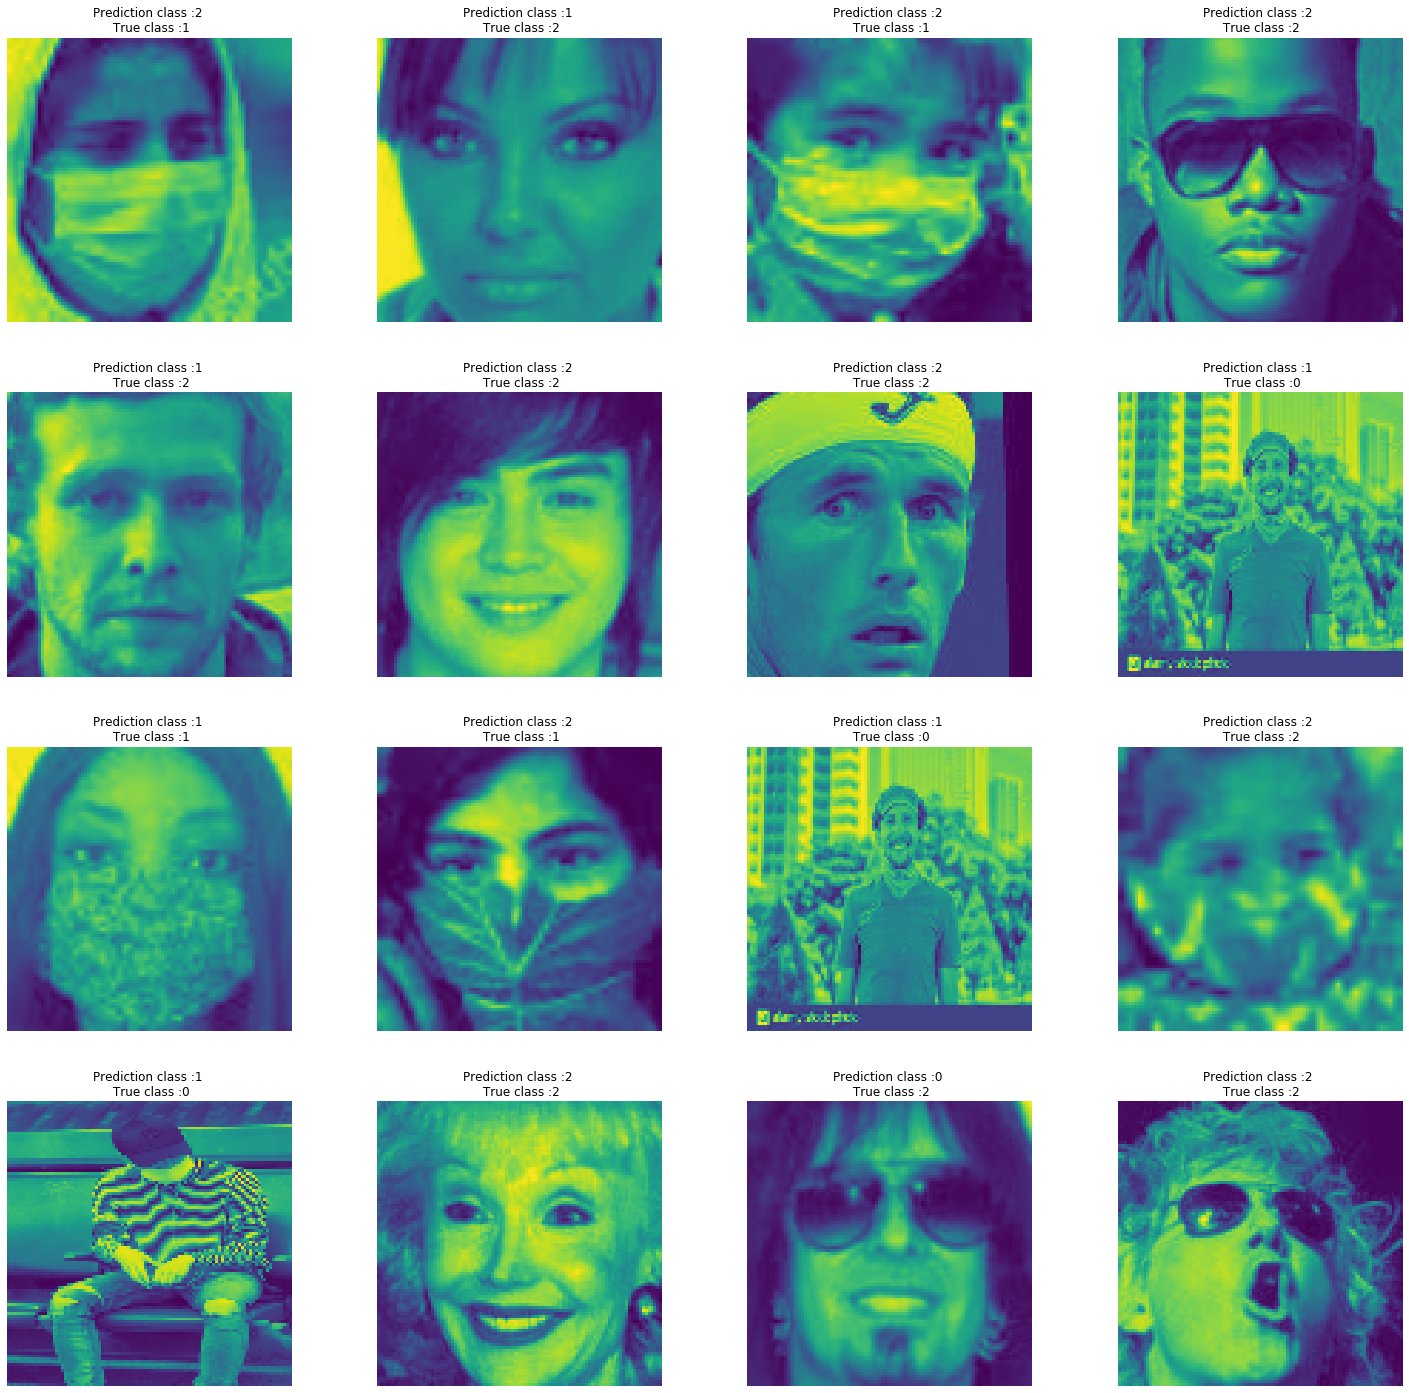

In [93]:
l = 4
w= 4
fig , axes = plt.subplots(l ,w ,figsize = (25,25))
axes = axes.ravel()

n_test = len(test_data)

for i in range(0 , l*w):
  index = random.randint(0 , n_test)
  axes[i].imshow(tf.squeeze(test_data[index]))
  axes[i].set_title('Prediction class :{} \n True class :{}'.format(train_target[index] , test_target[index]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.3)